### Data Mining and Machine Learning
### Principal Components Analysis (PCA)
### Edgar Acuna

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


### Example 1. Applying PCA to Diabetes

In [2]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
y=data['class']
X=data.iloc[:,0:8]

### Normalizing (standarizing ) los datos

In [3]:
X = StandardScaler().fit_transform(X)

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Using only 2 principal components

In [4]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
print pca.explained_variance_

[ 2.09711056  1.73346726]


In [5]:
print pca.explained_variance_ratio_

[ 0.26179749  0.21640127]


In [6]:
print pca.explained_variance_ratio_.cumsum()

[ 0.26179749  0.47819876]


Comentario: Las dos componentes principales solo acumulan el 47.81% de la variacion de los datos originales. La Varianza de cada componente aun es mayor que 1. Se necesitan usar mas componentes

In [7]:
#Applying LDA to the 2 components and the percentage of precision
ldadis = LinearDiscriminantAnalysis().fit(principalComponents,y)
#Tasa de precision
ypred=ldadis.predict(principalComponents)
precision=(y==ypred).sum()/float(768)
print "Este la precision con 2 PC=", precision

Este la precision con 2 PC= 0.717447916667


In [8]:
pcaDF=pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pcaDF.head()

,PC1,PC2
0,1.068503,1.234895
1,-1.121683,-0.733852
2,-0.396477,1.595876
3,-1.115781,-1.271241
4,2.359334,-2.184819


In [9]:
#hallando la correlacion de las dos primeras compoenentes principales
pcaDF.corr()

,PC1,PC2
PC1,1.000000e+00,2.229720e-16
PC2,2.229720e-16,1.000000e+00


Notar que la correlacion entre PC1 y PC2 es 0

In [10]:
finalDf = pd.concat([pcaDF, data[['class']]], axis = 1)
finalDf.head(5)

,PC1,PC2,class
0,1.068503,1.234895,2
1,-1.121683,-0.733852,1
2,-0.396477,1.595876,2
3,-1.115781,-1.271241,1
4,2.359334,-2.184819,2


### Visualizing the data using two PC 

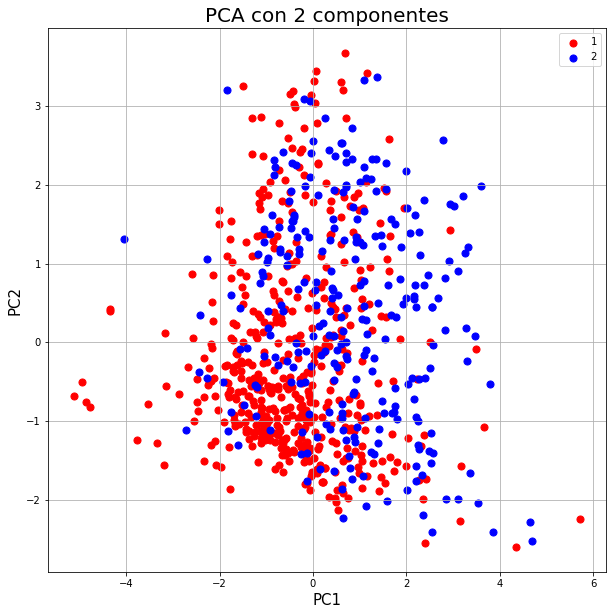

In [11]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA con 2 componentes', fontsize = 20)


targets = [1, 2]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Using  three PCA's for Diabetes

In [12]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
print pca.explained_variance_
print pca.explained_variance_ratio_
print pca.explained_variance_ratio_.cumsum()

[ 2.09711056  1.73346726  1.03097228]
[ 0.26179749  0.21640127  0.12870373]
[ 0.26179749  0.47819876  0.60690249]


Comentario: las tres primeras componentes principales acumulan solo el 60.90% de la variacion Total. Todas las varianzas tienen varianza mayor que 1.  Aun se  necesitan mas componentes

In [13]:
#Haciendo el analisis discriminante y calculando el porcentaje de precision
ldadis = LinearDiscriminantAnalysis().fit(principalComponents,y)
#Tasa de precision
ypred=ldadis.predict(principalComponents)
precision=(y==ypred).sum()/float(768)
print "Este la precision con tres PC=", precision

Este la precision con tres PC= 0.73046875


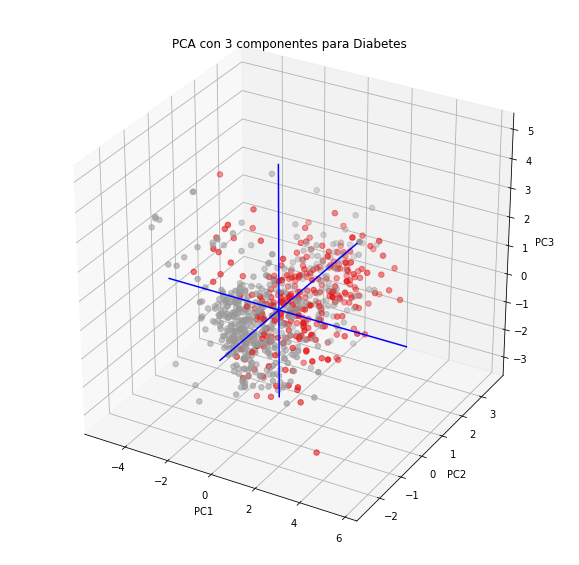

In [14]:
#Haciendo la grafica 3D
# Store results of PCA in a data frame
result=pd.DataFrame(principalComponents, columns=['PCA%i' % i for i in range(3)], index=data.index)
# Plot initialisation
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=y,  cmap="Set1_r", s=30)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'b')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'b')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'b')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA con 3 componentes para Diabetes")
#plt.show()


In [15]:
#Haciendo el analisis discriminante y calculando el porcentaje de precision
ldadis = LinearDiscriminantAnalysis().fit(principalComponents,y)
#Tasa de precision
ldadis.score(principalComponents, y)

0.73046875

### Screeplot to decide the optimal number of  components

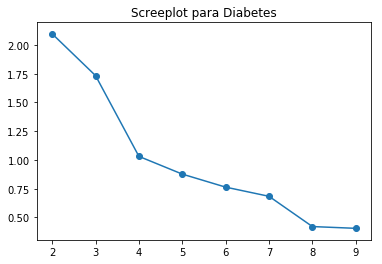

In [16]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(X)
y=pca.explained_variance_
x=range(2,10)
plt.scatter(x,y)
plt.plot(x,y)
plt.title("Screeplot para Diabetes")

### Example 2: Applying  PCA to Landsat

In [17]:
#Cargando el conjunto de datos Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
X = StandardScaler().fit_transform(X)
#y1=y.as_matrix()
#X1=X.as_matrix()

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
pcaDF=pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
print pca.explained_variance_
print pca.explained_variance_ratio_
print pca.explained_variance_ratio_.cumsum()

[ 16.48810712  14.08354844]
[ 0.45789971  0.39112147]
[ 0.45789971  0.84902117]


In [19]:
pcaDF['class']=y
finalDf=pcaDF
finalDf.tail(5)

,PC1,PC2,class
4430,0.612799,2.700792,5
4431,1.241313,1.681827,5
4432,1.354049,0.482016,4
4433,1.501719,-0.140714,4
4434,1.505878,-0.378510,4


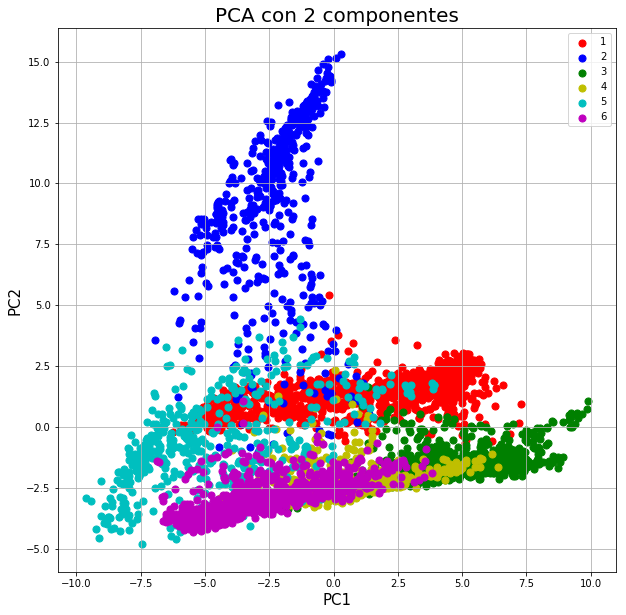

In [20]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA con 2 componentes', fontsize = 20)


targets = [1, 2, 3,4,5,6]
colors = ['r', 'b','g','y','c','m']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [21]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
print pca.explained_variance_
print pca.explained_variance_ratio_
print pca.explained_variance_ratio_.cumsum()

[ 16.48810712  14.08354844   1.60839775]
[ 0.45789971  0.39112147  0.04466764]
[ 0.45789971  0.84902117  0.89368882]
